# Exploring Global Video Game Sales

**Melek, Amisha & Ariel**

## Part I: Data Cleaning and Preparation

### Step 1 : Load the dataset and inspect its structure

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
# Loading the dataset 
df = pd.read_csv('vgsales.csv')

In [160]:
# Displaying the first few rows
print("\n First 5 rows of the dataset:")
print(df.head())


 First 5 rows of the dataset:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [161]:
# Displaying the dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [162]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [163]:
# Displaying the shape
print(f"\nDataset shape: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset shape: 16598 rows, 11 columns


### Step 2 : Check for missing or inconsistent values

In [164]:
# Count missing values per column
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### Step 3: Handle missing data appropriately; decide whether to impute, drop, or leave as is

In [165]:
# --- Before cleaning ---
print("\nMissing values BEFORE cleaning:")
print(df.isnull().sum())


Missing values BEFORE cleaning:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [166]:
#Year is numeric → fill with median
df['Year'] = df['Year'].fillna(df['Year'].median())

In [167]:
#Publisher missing → fill with 'Unknown'
df['Publisher'] = df['Publisher'].fillna("Unknown")

In [168]:
print("\nMissing values AFTER cleaning:")
print(df.isnull().sum())


Missing values AFTER cleaning:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [169]:
print(f"\nRows after cleaning: {df.shape[0]}")


Rows after cleaning: 16598


### Step 4: Ensure columns have appropriate data types

In [170]:
# Convert Year to integer
df['Year'] = df['Year'].astype(np.int64)

In [171]:
# Ensure numeric columns are numeric
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### Step 5: Check for duplicates and remove them

In [172]:
# Counting duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")



Duplicate rows found: 0


In [173]:
# Removing duplicates
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

## Part II: EDA

### Descriptive statistics

#### Step 1 : Compute key descriptive statistics for numerical variables

In [174]:
print("\nBasic statistics for all numerical columns:")
print(df.describe())


Basic statistics for all numerical columns:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.

In [175]:
print("Detailed Sales Statistics:")
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for col in sales_columns:
    print(f"\n{col}:")
    print(f"  Mean:   {df[col].mean():.2f} million")
    print(f"  Median: {df[col].median():.2f} million")
    print(f"  Max:    {df[col].max():.2f} million")
    print(f"  Min:    {df[col].min():.2f} million")


Detailed Sales Statistics:

NA_Sales:
  Mean:   0.26 million
  Median: 0.08 million
  Max:    41.49 million
  Min:    0.00 million

EU_Sales:
  Mean:   0.15 million
  Median: 0.02 million
  Max:    29.02 million
  Min:    0.00 million

JP_Sales:
  Mean:   0.08 million
  Median: 0.00 million
  Max:    10.22 million
  Min:    0.00 million

Other_Sales:
  Mean:   0.05 million
  Median: 0.01 million
  Max:    10.57 million
  Min:    0.00 million

Global_Sales:
  Mean:   0.54 million
  Median: 0.17 million
  Max:    82.74 million
  Min:    0.01 million
  Max:    41.49 million
  Min:    0.00 million

EU_Sales:
  Mean:   0.15 million
  Median: 0.02 million
  Max:    29.02 million
  Min:    0.00 million

JP_Sales:
  Mean:   0.08 million
  Median: 0.00 million
  Max:    10.22 million
  Min:    0.00 million

Other_Sales:
  Mean:   0.05 million
  Median: 0.01 million
  Max:    10.57 million
  Min:    0.00 million

Global_Sales:
  Mean:   0.54 million
  Median: 0.17 million
  Max:    82.74 million

#### Step 2 : Identify the top 10 best-selling games globally

In [176]:
# Identifying the top 10 games
top_10 = df.nlargest(10, 'Global_Sales')
print("\nTop 10 Best-Selling Games:")
print(top_10[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']])



Top 10 Best-Selling Games:
                        Name Platform  Year         Genre Publisher  \
0                 Wii Sports      Wii  2006        Sports  Nintendo   
1          Super Mario Bros.      NES  1985      Platform  Nintendo   
2             Mario Kart Wii      Wii  2008        Racing  Nintendo   
3          Wii Sports Resort      Wii  2009        Sports  Nintendo   
4   Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   
5                     Tetris       GB  1989        Puzzle  Nintendo   
6      New Super Mario Bros.       DS  2006      Platform  Nintendo   
7                   Wii Play      Wii  2006          Misc  Nintendo   
8  New Super Mario Bros. Wii      Wii  2009      Platform  Nintendo   
9                  Duck Hunt      NES  1984       Shooter  Nintendo   

   Global_Sales  
0         82.74  
1         40.24  
2         35.82  
3         33.00  
4         31.37  
5         30.26  
6         30.01  
7         29.02  
8         28.62  
9         

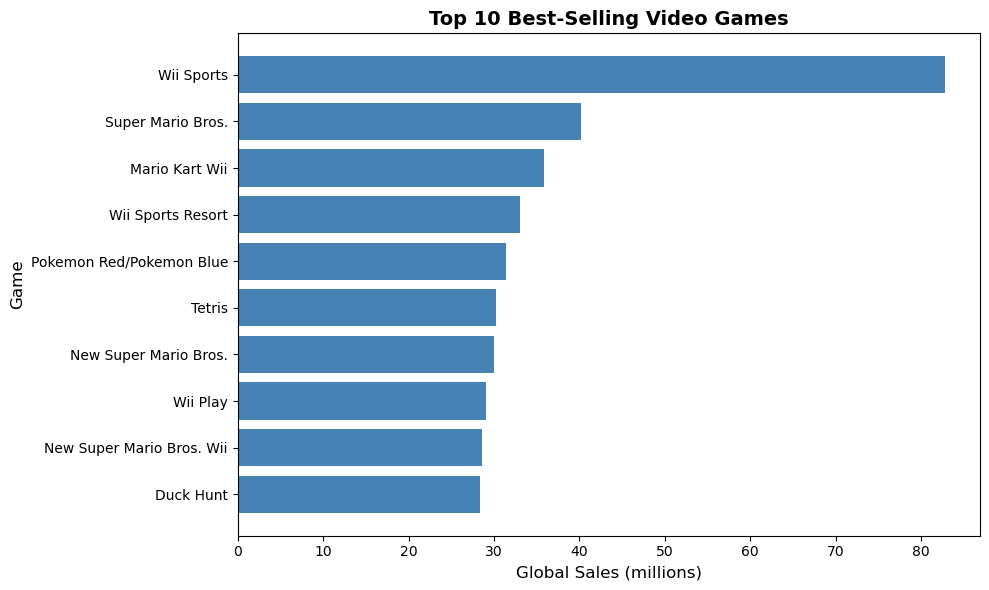

In [177]:
# Visualize top 10 games
plt.figure(figsize=(10, 6))
plt.barh(top_10['Name'], top_10['Global_Sales'], color='steelblue')
plt.xlabel('Global Sales (millions)', fontsize=12)
plt.ylabel('Game', fontsize=12)
plt.title('Top 10 Best-Selling Video Games', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

### Trends over time

#### Step 1 : Analyze the number of games released per year

In [178]:
print("\n--- Games Released Per Year ---")
games_per_year = df.groupby('Year').size().reset_index(name='Count')
print(games_per_year)


--- Games Released Per Year ---
    Year  Count
0   1980      9
1   1981     46
2   1982     36
3   1983     17
4   1984     14
5   1985     14
6   1986     21
7   1987     16
8   1988     15
9   1989     17
10  1990     16
11  1991     41
12  1992     43
13  1993     60
14  1994    121
15  1995    219
16  1996    263
17  1997    289
18  1998    379
19  1999    338
20  2000    349
21  2001    482
22  2002    829
23  2003    775
24  2004    763
25  2005    941
26  2006   1008
27  2007   1473
28  2008   1428
29  2009   1431
30  2010   1259
31  2011   1139
32  2012    657
33  2013    546
34  2014    582
35  2015    614
36  2016    344
37  2017      3
38  2020      1


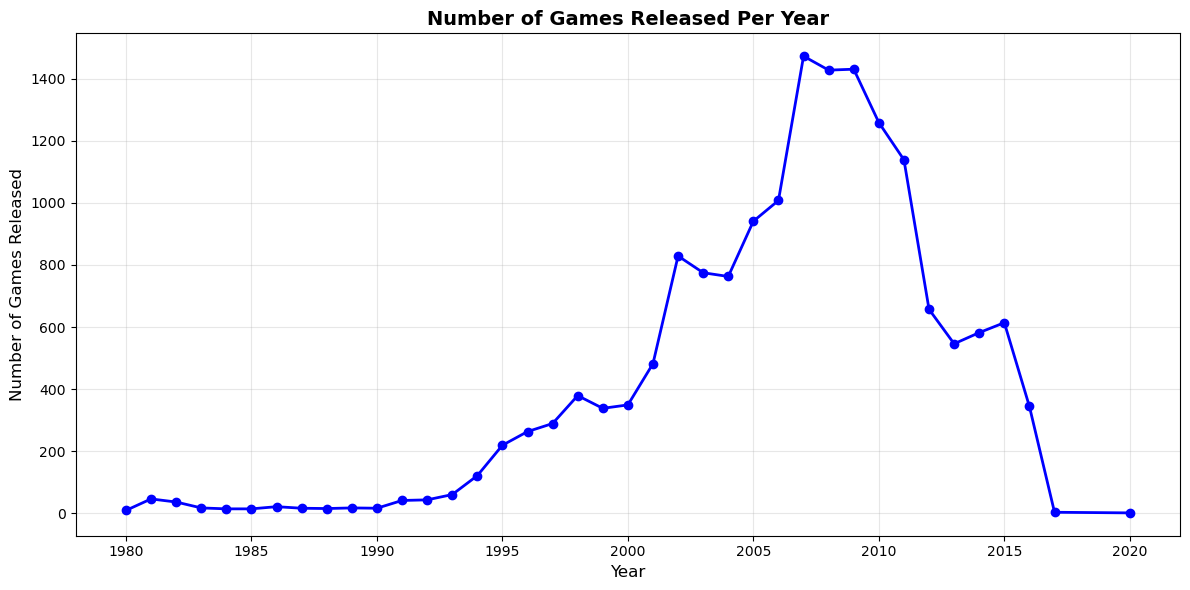

In [179]:
# Visualize games released per year
plt.figure(figsize=(12, 6))
plt.plot(games_per_year['Year'], games_per_year['Count'], 
         marker='o', linewidth=2, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Games Released', fontsize=12)
plt.title('Number of Games Released Per Year', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Step 2 : Plot global sales over time — are sales increasing or decreasing?

In [180]:
#Plotting the global sales over time
print("\n--- Global Sales Over Time ---")
sales_per_year = df.groupby('Year')['Global_Sales'].sum().reset_index()
print(sales_per_year)


--- Global Sales Over Time ---
    Year  Global_Sales
0   1980         11.38
1   1981         35.77
2   1982         28.86
3   1983         16.79
4   1984         50.36
5   1985         53.94
6   1986         37.07
7   1987         21.74
8   1988         47.22
9   1989         73.45
10  1990         49.39
11  1991         32.23
12  1992         76.16
13  1993         45.98
14  1994         79.17
15  1995         88.11
16  1996        199.15
17  1997        200.98
18  1998        256.47
19  1999        251.27
20  2000        201.56
21  2001        331.47
22  2002        395.52
23  2003        357.85
24  2004        419.31
25  2005        459.94
26  2006        521.04
27  2007        711.21
28  2008        678.90
29  2009        667.30
30  2010        600.45
31  2011        515.99
32  2012        363.54
33  2013        368.11
34  2014        337.05
35  2015        264.44
36  2016         70.93
37  2017          0.05
38  2020          0.29


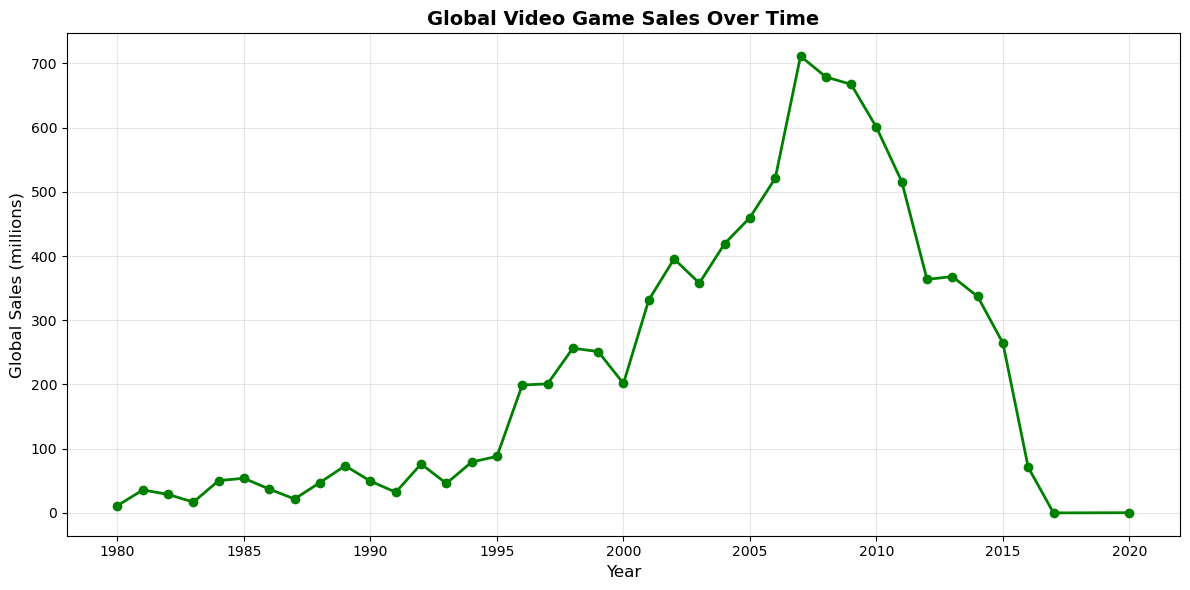

In [181]:
# Visualizing the global sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_per_year['Year'], sales_per_year['Global_Sales'], 
         marker='o', linewidth=2, color='green')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (millions)', fontsize=12)
plt.title('Global Video Game Sales Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [182]:
#Analysing if the sales are increasing or decreasing?
print("\nSales Trend Analysis:")
peak_year = sales_per_year.loc[sales_per_year['Global_Sales'].idxmax(), 'Year']
peak_sales = sales_per_year['Global_Sales'].max()
print(f"Peak sales year: {peak_year}")
print(f"Peak sales: {peak_sales:.2f} million")


Sales Trend Analysis:
Peak sales year: 2007
Peak sales: 711.21 million


In [183]:
# Checking the recent trend (last 5 years in data)
recent_years = sales_per_year.tail(5)
if recent_years['Global_Sales'].is_monotonic_decreasing:
    print("Recent trend: DECREASING")
elif recent_years['Global_Sales'].is_monotonic_increasing:
    print("Recent trend: INCREASING")
else:
    print("Recent trend: MIXED")

Recent trend: MIXED


### Genre analysis

#### Step 1 : Which genres are most common?

In [184]:
# Genres that are the most in common
print("\n--- Most Common Genres ---")
genre_counts = df['Genre'].value_counts()
print(genre_counts)


--- Most Common Genres ---
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


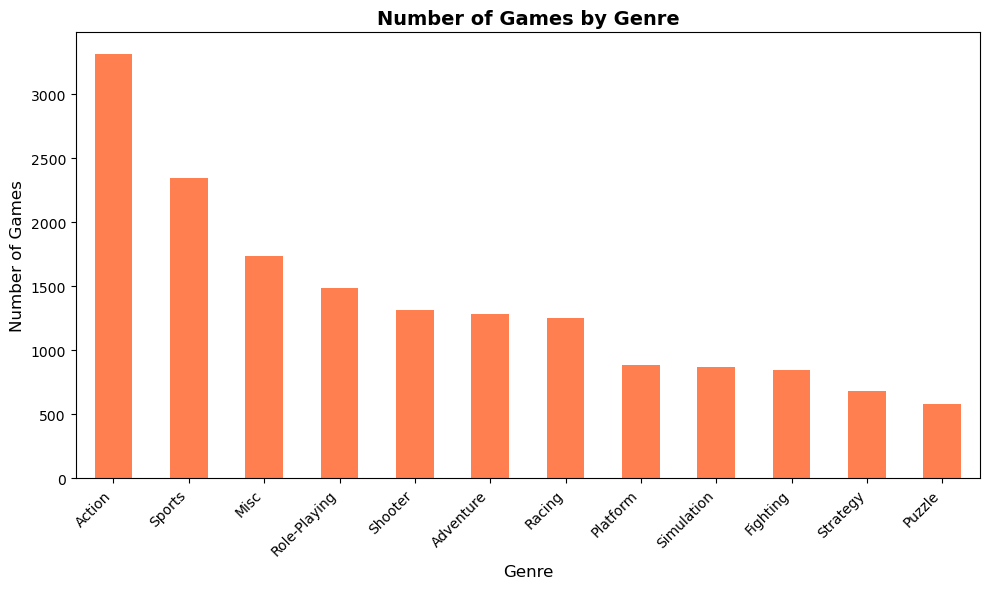

In [185]:
#Visualizing the genre counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='coral')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Number of Games by Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Step 2 : Which genres generate the most global sales?

In [186]:
# Genres that generate the most global sales
print("\n--- Genres by Total Global Sales ---")
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(genre_sales)


--- Genres by Total Global Sales ---
Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


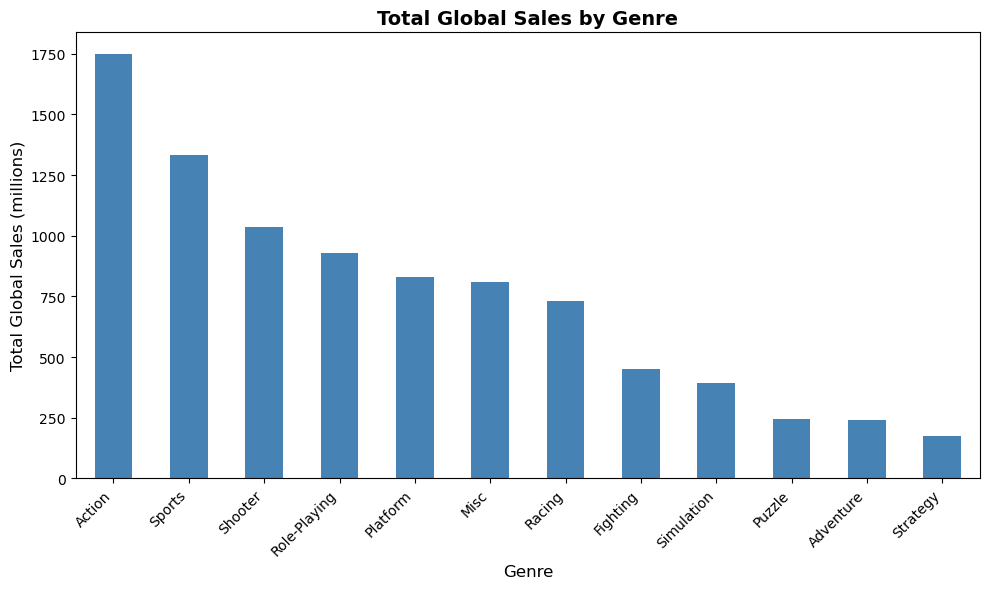

In [187]:
# Visualizing the genre sales
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='steelblue')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Global Sales (millions)', fontsize=12)
plt.title('Total Global Sales by Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [188]:
# Average sales per game by genre
print("\n--- Average Sales Per Game by Genre ---")
avg_sales = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print(avg_sales.round(2))


--- Average Sales Per Game by Genre ---
Genre
Platform        0.94
Shooter         0.79
Role-Playing    0.62
Racing          0.59
Sports          0.57
Fighting        0.53
Action          0.53
Misc            0.47
Simulation      0.45
Puzzle          0.42
Strategy        0.26
Adventure       0.19
Name: Global_Sales, dtype: float64


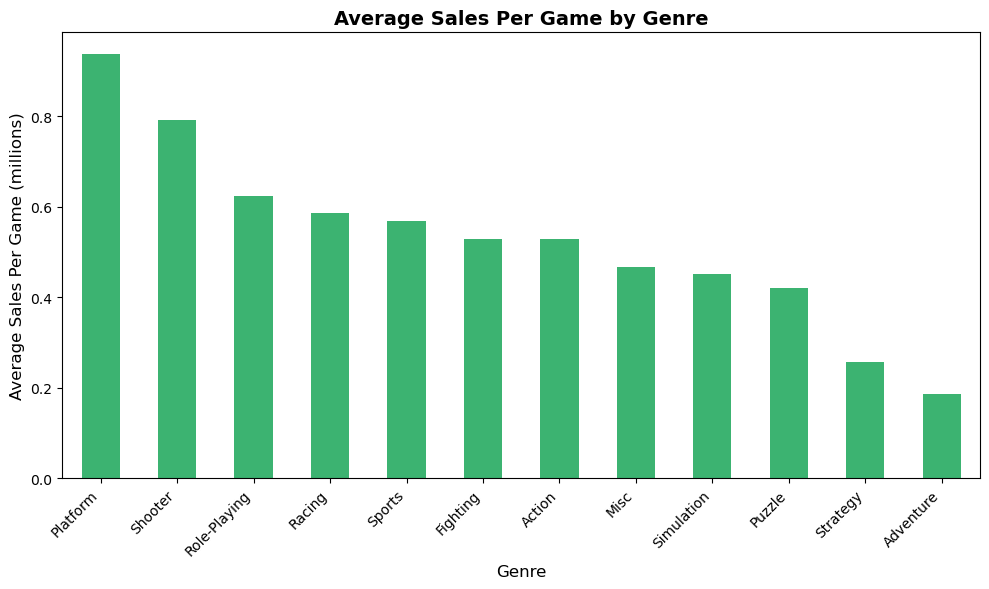

In [189]:
# Visualize average sales
plt.figure(figsize=(10, 6))
avg_sales.plot(kind='bar', color='mediumseagreen')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Sales Per Game (millions)', fontsize=12)
plt.title('Average Sales Per Game by Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Platfrom analysis

#### Step 1 : What are the most popular platforms by number of games and total sales?

In [190]:
print("\n---Most Popular Platfrom (sorted by sales)---")
popular_pub = (
    df.groupby('Platform')[['Global_Sales','Name']]
      .agg({
          'Global_Sales': 'sum',
          'Name': 'count'
      })
      .sort_values('Global_Sales', ascending=False)
)
print(popular_pub.round(2))



---Most Popular Platfrom (sorted by sales)---
          Global_Sales  Name
Platform                    
PS2            1255.64  2161
X360            979.96  1265
PS3             957.84  1329
Wii             926.71  1325
DS              822.49  2163
PS              730.66  1196
GBA             318.50   822
PSP             296.28  1213
PS4             278.10   336
PC              258.82   960
XB              258.26   824
GB              255.45    98
NES             251.07    98
3DS             247.46   509
N64             218.88   319
SNES            200.05   239
GC              199.36   556
XOne            141.06   213
2600             97.08   133
WiiU             81.86   143
PSV              61.93   413
SAT              33.59   173
GEN              28.36    27
DC               15.97    52
SCD               1.87     6
NG                1.44    12
WS                1.42     6
TG16              0.16     2
3DO               0.10     3
GG                0.04     1
PCFX              0.03   

#### Step 2 : How has platform popularity changed over time?

We'll create the popularity score based on  total Gobal sale and game count. We will study it evolution over the year to see how he platfrom popularity changes over time

In [191]:
platform_stats = (
    df.groupby(['Year', 'Platform'])
      .agg(
          num_games=('Name', 'count'),
          total_sales=('Global_Sales', 'sum')
      )
      .reset_index()
)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

platform_stats[['norm_games', 'norm_sales']] = scaler.fit_transform(
    platform_stats[['num_games', 'total_sales']]
)

#let's say that the number of game matter more than the sell 
platform_stats['popularity_score'] = (
    0.7 * platform_stats['norm_games'] +
    0.3 * platform_stats['norm_sales']
)
platform_stats

,Year,Platform,num_games,total_sales,norm_games,norm_sales,popularity_score
0,1980,2600,9,11.38,0.016293,0.053646,0.027499
1,1981,2600,46,35.77,0.091650,0.168823,0.114802
2,1982,2600,36,28.86,0.071283,0.136192,0.090756
3,1983,2600,11,5.83,0.020367,0.027437,0.022488
4,1983,NES,6,10.96,0.010183,0.051662,0.022627
...,...,...,...,...,...,...,...
242,2016,X360,8,0.83,0.014257,0.003825,0.011127
243,2016,XOne,54,12.37,0.107943,0.058321,0.093056
244,2017,PS4,1,0.03,0.000000,0.000047,0.000014
245,2017,PSV,2,0.02,0.002037,0.000000,0.001426


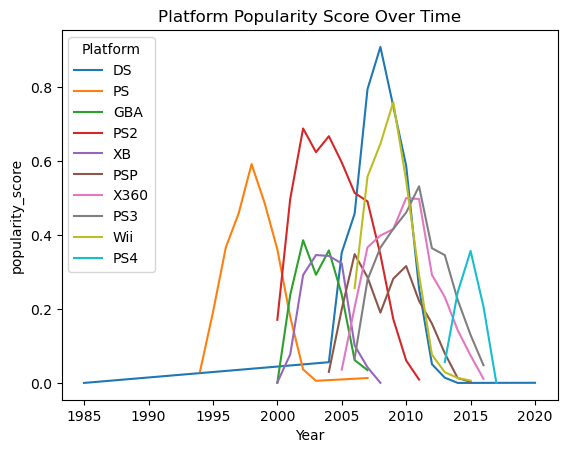

In [192]:
top_platforms = (
    platform_stats.groupby('Platform')['popularity_score']
    .mean()
    .sort_values(ascending=False)
    .head(10) #since there is a lot of platforms, we'll look at the top 10
    .index
)

plot_data = platform_stats[platform_stats['Platform'].isin(top_platforms)]

sns.lineplot(
    data=plot_data,
    x='Year',
    y='popularity_score',
    hue='Platform'
)

plt.title('Platform Popularity Score Over Time')
plt.show()

As we can see the more game are released on a platfrom the more popularity it gain and the more relevant it stay, but if it can keep up with the new game it will inevitably die down 

### Regional Analysis

#### Step 1 & 2 : Compare preferences between North America, Europe, and Japan & Are there genres that dominate in one region but not others?

To answer the two question we will plot the top five genre in each region and try to study the similarities and diffrences between them

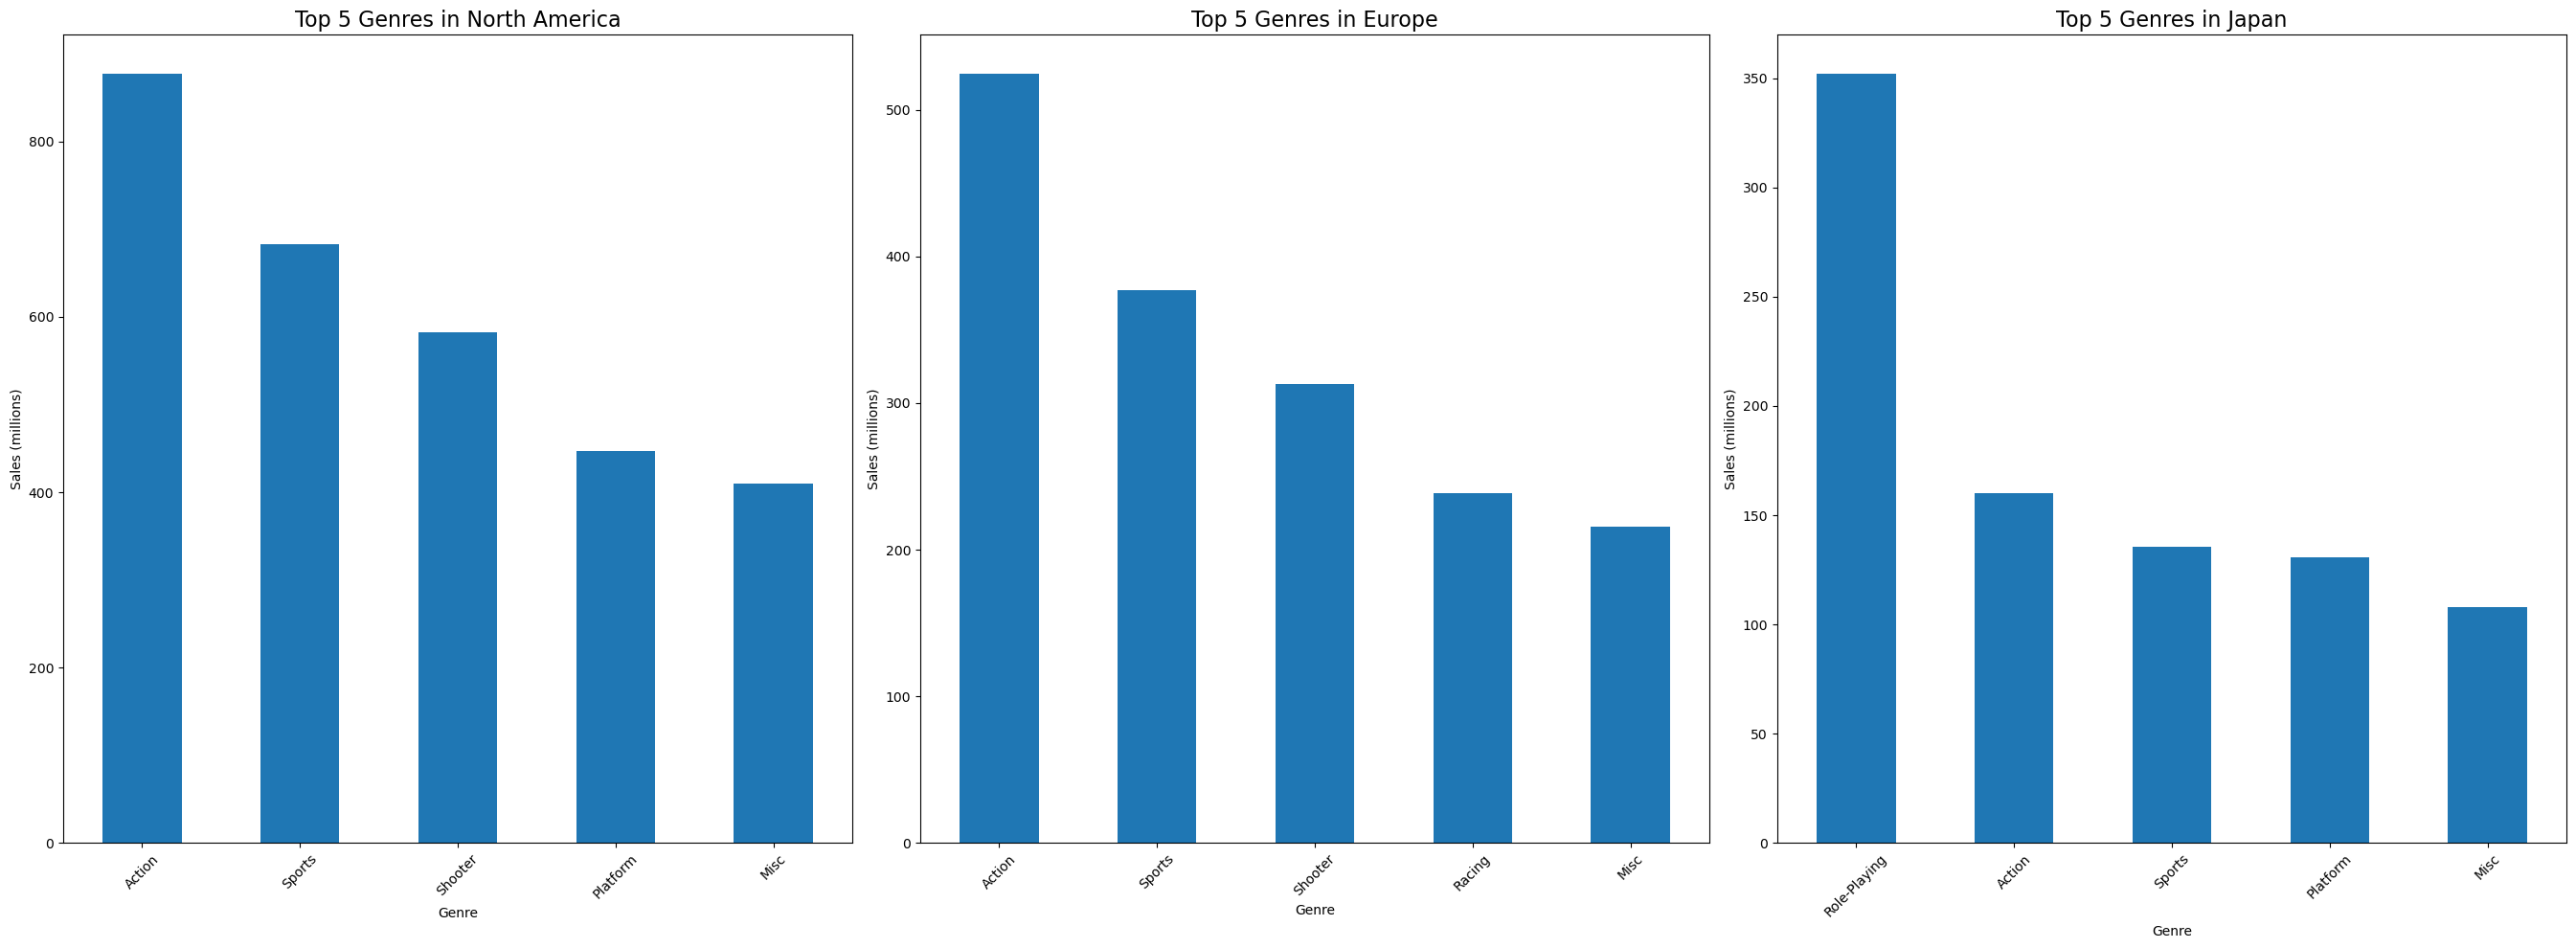

In [193]:
region_genre = (
    df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']]
      .sum()
      .sort_values(by='NA_Sales', ascending=False)
)

top5_na = region_genre.sort_values(by='NA_Sales', ascending=False).head(5)
top5_eu = region_genre.sort_values(by='EU_Sales', ascending=False).head(5)
top5_jp = region_genre.sort_values(by='JP_Sales', ascending=False).head(5)

fig, axes = plt.subplots(1, 3, figsize=(27, 10))

regions = ["NA_Sales", "EU_Sales", "JP_Sales"]
titles = ["North America", "Europe", "Japan"]

for ax, region, title in zip(axes, regions, titles):
    region_genre.nlargest(5, region)[region].plot(kind='bar', ax=ax)
    ax.set_title(f"Top 5 Genres in {title}", fontsize=16)
    ax.set_ylabel("Sales (millions)")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

North America and Europe have very similar tastes, Action, Shooter, Sports usually dominate. plus we can see a preference for high-budget titles (triple A games)
In Japan on the other hand Role-Playing games (JRPG) massively outperform other genres and Shooter genre is far less dominant than in the western market

### Publisher insights

#### Step 1 : Identify the top 10 publishers by total global sales

<Axes: title={'center': 'Top 10 Publishers by Global Sales'}, ylabel='Publisher'>

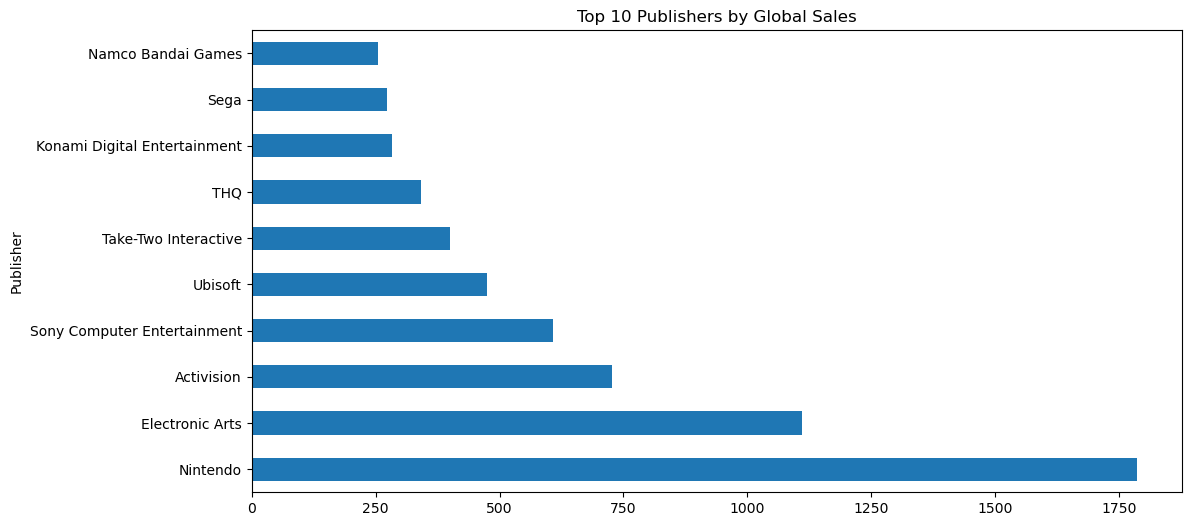

In [194]:
top_publishers = (
    df.groupby("Publisher")["Global_Sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
top_publishers.plot(kind="barh", figsize=(12,6), title="Top 10 Publishers by Global Sales")

#### Step 2 : Is there a “hit publisher” that dominates certain genres?

In [195]:
print("\n---Bestseller Publisher by genre---")
publisher_genre = (
    df.groupby(["Publisher", "Genre"])["Global_Sales"]
      .sum()
      .reset_index()
)

dominant_publishers = (
    publisher_genre
    .sort_values(["Genre", "Global_Sales"], ascending=[True, False])
    .groupby("Genre")
    .head(1)
)

print(dominant_publishers)



---Bestseller Publisher by genre---
                 Publisher         Genre  Global_Sales
1569  Take-Two Interactive        Action        211.08
1155              Nintendo     Adventure         35.71
1538                   THQ      Fighting         72.86
1157              Nintendo          Misc        180.67
1158              Nintendo      Platform        427.21
1159              Nintendo        Puzzle        124.88
1160              Nintendo        Racing        151.30
1161              Nintendo  Role-Playing        284.90
91              Activision       Shooter        299.87
508        Electronic Arts    Simulation         89.53
509        Electronic Arts        Sports        479.67
1165              Nintendo      Strategy         27.35


Based on the results , it appears there is indeed a "hit publisher" that dominates certain genres: Nintendo.
It is the top-selling publisher in the following seven genres, often with very high Global Sales figures: Platform (427.21) Role-Playing (284.90) Misc (180.67) Racing (151.30) Puzzle (124.88) Adventure (35.71) Strategy (27.35)

### Market Dominance Analysis

#### Step 1 : Calculate each publisher’s market share within each genre (their sales / total genre sales)

In [196]:
genre_totals = df.groupby("Genre")["Global_Sales"].sum().reset_index()
market_share = pd.merge(
    publisher_genre,
    genre_totals,
    on="Genre",
    suffixes=("", "_Total")
)
market_share["Market_Share"] = (
    market_share["Global_Sales"] / market_share["Global_Sales_Total"])
print("\n---Publisher Market Share by Genre---")
market_share.sort_values(["Genre", "Market_Share"], ascending=[True, False]).head(20)


---Publisher Market Share by Genre---


,Publisher,Genre,Global_Sales,Global_Sales_Total,Market_Share
1569,Take-Two Interactive,Action,211.08,1751.18,0.120536
1655,Ubisoft,Action,142.94,1751.18,0.081625
83,Activision,Action,142.33,1751.18,0.081277
1154,Nintendo,Action,128.18,1751.18,0.073196
1748,Warner Bros. Interactive Entertainment,Action,118.24,1751.18,0.067520
499,Electronic Arts,Action,115.54,1751.18,0.065978
1412,Sony Computer Entertainment,Action,94.52,1751.18,0.053975
1536,THQ,Action,89.23,1751.18,0.050954
291,Capcom,Action,85.16,1751.18,0.048630
900,Konami Digital Entertainment,Action,71.33,1751.18,0.040733


#### Step 2 : Identify if a publisher is a “genre leader” (has >30% market share in that genre)

In [197]:
genre_leaders = market_share[market_share["Market_Share"] > 0.3]
print("\n---Genre Leaders (Market Share > 30%)---")
genre_leaders


---Genre Leaders (Market Share > 30%)---


,Publisher,Genre,Global_Sales,Global_Sales_Total,Market_Share
509,Electronic Arts,Sports,479.67,1330.93,0.360402
1158,Nintendo,Platform,427.21,831.37,0.513863
1159,Nintendo,Puzzle,124.88,244.95,0.509818
1161,Nintendo,Role-Playing,284.90,927.37,0.307213


#### Step 3 : Genre Diversity, Regional Consistency, Hit Rate

For each publisher, compute:

a. Genre Diversity Score: How many different genres they publish in

b. Regional Consistency Score: Standard deviation of their sales proportions across
regions (lower = more consistent)

c. Hit Rate: Percentage of their games that sold above the median of their genre

In [198]:
# Publisher metrics: Genre Diversity, Regional Consistency, Hit Rate

# median global sales per genre
genre_medians = df.groupby('Genre')['Global_Sales'].median()

# vectorized boolean: game sold above its genre median (rule to follow)
above_median = df['Global_Sales'] > df['Genre'].map(genre_medians)

# aggregate per publisher
pub_agg = (
    df.assign(Above_Median=above_median)
      .groupby('Publisher')
      .agg(
          total_games=('Name', 'count'),
          genre_diversity_score=('Genre', pd.Series.nunique),
          na_sales=('NA_Sales', 'sum'),
          eu_sales=('EU_Sales', 'sum'),
          jp_sales=('JP_Sales', 'sum'),
          above_median_games=('Above_Median', 'sum'),
          total_global_sales_millions=('Global_Sales', 'sum')
      )
      .reset_index()
)

# regional proportions and consistency (std of proportions across NA/EU/JP)
region_cols = ['na_sales', 'eu_sales', 'jp_sales']
pub_agg['region_total'] = pub_agg[region_cols].sum(axis=1)
proportions = pub_agg[region_cols].div(pub_agg['region_total'].replace(0, np.nan), axis=0).fillna(0)
pub_agg['regional_consistency_score'] = proportions.std(axis=1)

# hit rate (% of games above genre median)
pub_agg['hit_rate_pct'] = (pub_agg['above_median_games'] / pub_agg['total_games']).fillna(0) * 100

# final publisher metrics dataframe
publisher_metrics = pub_agg[[
    'Publisher',
    'total_games',
    'genre_diversity_score',
    'regional_consistency_score',
    'hit_rate_pct',
    'total_global_sales_millions'
]].sort_values(['hit_rate_pct', 'total_global_sales_millions'], ascending=[False, False]).reset_index(drop=True)

# display results (rounded)
publisher_metrics.round({
    'regional_consistency_score': 4,
    'hit_rate_pct': 2,
    'total_global_sales_millions': 2
})

,Publisher,total_games,genre_diversity_score,regional_consistency_score,hit_rate_pct,total_global_sales_millions
0,Red Orb,2,1,0.3517,100.0,5.24
1,Imagic,4,2,0.5292,100.0,4.82
2,Arena Entertainment,2,2,0.4220,100.0,4.72
3,Palcom,1,1,0.4204,100.0,4.17
4,Valve Software,3,1,0.3033,100.0,3.23
...,...,...,...,...,...,...
573,Piacci,1,1,0.5774,0.0,0.01
574,Rain Games,1,1,0.5774,0.0,0.01
575,Stainless Games,1,1,0.2887,0.0,0.01
576,Takuyo,1,1,0.5774,0.0,0.01


#### Step 4 : Create a final Market Power Index using a custom formula combining these metrics

Why normalize : 
- Problem: We can't directly compare "10 genres" vs "500M in sales"—different units, different scales.
  
    => Solution: Normalization puts everything on the same scale so we can combine them mathematically.
Why MinMax (0-100): Preserves the relative ranking and is intuitive (100 = best, 0 = worst).

- Special handling for Regional Consistency:

    We inverted it (ranked ascending) because LOWER std = BETTER consistency
=> This ensures higher scores always mean better performance across all metrics

Why Weighted Composite Score for Market power index creation (not equal)?

- Not all metrics are equally important for market power
- Our weights reflect business priorities:

    - 30% Hit Rate: Quality matters most—profitable publishers make good games
    - 25% Total Sales: Revenue is the ultimate measure of market impact
    - 20% Diversity: Risk management and adaptability
    - 15% Regional Consistency: Global reach provides stability
    - 10% Volume: Least important—quantity alone doesn't equal power

- Why this approach works:

    - Creates a single, interpretable score for ranking
    - Balances quality (hit rate) with scale (sales)
    - Allows customization—weights can be adjusted 

In [199]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))

# Select metrics for normalization
metrics_to_normalize = [
    'total_games',
    'genre_diversity_score', 
    'hit_rate_pct',
    'total_global_sales_millions'
]

# Create normalized versions
normalized = pd.DataFrame(
    scaler.fit_transform(publisher_metrics[metrics_to_normalize]),
    columns=[f'{col}_norm' for col in metrics_to_normalize]
)

# Invert regional consistency (lower std = more consistent = better)
publisher_metrics['regional_consistency_norm'] = scaler.fit_transform(
    publisher_metrics[['regional_consistency_score']].rank(ascending=True)
)

# Combine normalized metrics - reset index to avoid duplicate labels
publisher_metrics = publisher_metrics.reset_index(drop=True)
normalized = normalized.reset_index(drop=True)
publisher_metrics = pd.concat([publisher_metrics, normalized], axis=1)

# Market Power Index Formula (weighted combination)
# Weights emphasize quality (hit rate) and scale (sales) over quantity
publisher_metrics['market_power_index'] = (
    0.30 * publisher_metrics['hit_rate_pct_norm'] +           # Quality of releases
    0.25 * publisher_metrics['total_global_sales_millions_norm'] +  # Market scale
    0.20 * publisher_metrics['genre_diversity_score_norm'] +  # Portfolio breadth
    0.15 * publisher_metrics['regional_consistency_norm'] +   # Global reach
    0.10 * publisher_metrics['total_games_norm']              # Publishing volume
)

# Sort by Market Power Index
publisher_metrics = publisher_metrics.sort_values('market_power_index', ascending=False).reset_index(drop=True)

print("\n=== TOP 15 PUBLISHERS BY MARKET POWER INDEX ===")
display_cols = ['Publisher', 'market_power_index', 'hit_rate_pct', 
                'total_global_sales_millions', 'genre_diversity_score', 'total_games']
publisher_metrics[display_cols]



=== TOP 15 PUBLISHERS BY MARKET POWER INDEX ===


,Publisher,market_power_index,hit_rate_pct,total_global_sales_millions,genre_diversity_score,total_games
0,Nintendo,76.248364,85.206259,1786.56,12,703
1,Electronic Arts,70.986085,74.019245,1110.32,12,1351
2,Activision,61.446742,62.769231,727.46,12,975
3,THQ,54.922994,64.615385,340.77,12,715
4,Sony Computer Entertainment,54.875989,68.374817,607.50,12,683
...,...,...,...,...,...,...
573,Saurus,2.221762,0.000000,0.02,1,1
574,Stainless Games,2.221622,0.000000,0.01,1,1
575,Sting,1.884431,0.000000,0.65,1,9
576,Yacht Club Games,1.770504,0.000000,0.32,1,3


#### Step 5 : Rank Publishers and identify different publisher archetypes (e.g., “Genre Specialists” vs “Diversified Giants”)

The code identifies 8 distinct publisher types:

- Diversified Giants: High diversity, volume, and sales (e.g., EA, Activision)
- Genre Specialists: Focused portfolios with high hit rates
- Quality Boutiques: Low volume but very high hit rates
- Hit Makers: Consistently strong performers with excellent sales
- Volume Producers: High output with solid hit rates
- Regional Specialists: Strong in specific markets
- Niche Publishers: Small, focused operations
- Balanced Publishers: Middle-ground across metrics

In [200]:
def classify_publisher(row):
    """Classify publishers into archetypes based on their metrics"""
    
    hit_rate = row['hit_rate_pct']
    diversity = row['genre_diversity_score']
    total_games = row['total_games']
    sales = row['total_global_sales_millions']
    
    # Diversified Giants: High diversity, high volume, high sales
    if diversity >= 8 and total_games >= 50 and sales >= 200:
        return "Diversified Giant"
    
    # Genre Specialists: Low-medium diversity, high hit rate
    elif diversity <= 4 and hit_rate >= 45:
        return "Genre Specialist"
    
    # Quality Focused: High hit rate, lower volume
    elif hit_rate >= 50 and total_games <= 30:
        return "Quality Boutique"
    
    # Volume Publishers: High game count, moderate hit rate
    elif total_games >= 100 and hit_rate >= 30:
        return "Volume Producer"
    
    # Hit Makers: Very high hit rate, strong sales
    elif hit_rate >= 55 and sales >= 100:
        return "Hit Maker"
    
    # Regional Players: Low consistency score (high regional variance)
    elif row['regional_consistency_score'] >= 0.35 and sales >= 50:
        return "Regional Specialist"
    
    # Niche Players: Low volume, low-medium diversity
    elif total_games <= 20 and diversity <= 5:
        return "Niche Publisher"
    
    # Default for publishers not fitting above categories
    else:
        return "Balanced Publisher"

# Apply classification
publisher_metrics['archetype'] = publisher_metrics.apply(classify_publisher, axis=1)

# Display archetype distribution
print("\n\n=== PUBLISHER ARCHETYPE DISTRIBUTION ===")
archetype_counts = publisher_metrics['archetype'].value_counts()
print(archetype_counts.to_string())

# Show examples from each archetype
print("\n\n=== ARCHETYPE EXAMPLES (Top Publishers in Each Category) ===")
archetype_examples = []
for archetype in publisher_metrics['archetype'].unique():
    archetype_pubs = publisher_metrics[publisher_metrics['archetype'] == archetype]
    top_3 = archetype_pubs.head(3).copy()
    top_3['Archetype'] = archetype
    archetype_examples.append(top_3)

# Combine all examples into one dataframe
archetype_examples_df = pd.concat(archetype_examples, ignore_index=True)
display_cols = ['Archetype', 'Publisher', 'market_power_index', 'total_games', 
                'genre_diversity_score', 'hit_rate_pct', 'total_global_sales_millions']
archetype_examples_df[display_cols]



=== PUBLISHER ARCHETYPE DISTRIBUTION ===
archetype
Niche Publisher       337
Genre Specialist      122
Balanced Publisher     80
Quality Boutique       15
Diversified Giant      12
Volume Producer        12


=== ARCHETYPE EXAMPLES (Top Publishers in Each Category) ===


,Archetype,Publisher,market_power_index,total_games,genre_diversity_score,hit_rate_pct,total_global_sales_millions
0,Diversified Giant,Nintendo,76.248364,703,12,85.206259,1786.56
1,Diversified Giant,Electronic Arts,70.986085,1351,12,74.019245,1110.32
2,Diversified Giant,Activision,61.446742,975,12,62.769231,727.46
3,Volume Producer,Disney Interactive Studios,47.901926,218,10,75.688073,119.96
4,Volume Producer,Atari,47.294258,363,12,51.790634,157.22
5,Volume Producer,Warner Bros. Interactive Entertainment,43.248368,232,9,71.551724,153.89
6,Balanced Publisher,Banpresto,47.322848,73,12,52.054795,17.40
7,Balanced Publisher,SquareSoft,44.502183,52,7,88.461538,57.65
8,Balanced Publisher,Hudson Soft,41.556721,81,11,45.679012,23.01
9,Genre Specialist,Elf,46.834405,2,2,100.000000,0.64


In [201]:
# Create summary statistics by archetype
print("\n\n=== ARCHETYPE PERFORMANCE SUMMARY ===")
archetype_summary = publisher_metrics.groupby('archetype').agg({
    'Publisher': 'count',
    'market_power_index': 'mean',
    'hit_rate_pct': 'mean',
    'genre_diversity_score': 'mean',
    'total_games': 'mean',
    'total_global_sales_millions': 'mean'
}).round(2)

archetype_summary.columns = ['Count', 'Avg_MPI', 'Avg_Hit_Rate', 
                               'Avg_Diversity', 'Avg_Games', 'Avg_Sales_M']
print(archetype_summary.sort_values('Avg_MPI', ascending=False).to_string())

# Final ranked output
print("\n\n=== FINAL PUBLISHER RANKINGS WITH ARCHETYPES ===")
final_display = publisher_metrics[['Publisher', 'archetype', 'market_power_index', 
                                     'hit_rate_pct', 'total_global_sales_millions',
                                     'genre_diversity_score', 'total_games']].head(20)
#print(final_display.to_string(index=True))
final_display



=== ARCHETYPE PERFORMANCE SUMMARY ===
                    Count  Avg_MPI  Avg_Hit_Rate  Avg_Diversity  Avg_Games  Avg_Sales_M
archetype                                                                              
Diversified Giant      12    53.83         60.58          12.00     727.83       558.69
Volume Producer        12    39.72         49.60          10.92     209.75        87.20
Quality Boutique       15    34.57         63.96           5.87      16.47         9.50
Genre Specialist      122    34.25         82.29           1.62       3.53         1.55
Balanced Publisher     80    26.23         24.99           7.76      42.90         9.15
Niche Publisher       337    14.29          5.13           1.91       3.67         0.31


=== FINAL PUBLISHER RANKINGS WITH ARCHETYPES ===


,Publisher,archetype,market_power_index,hit_rate_pct,total_global_sales_millions,genre_diversity_score,total_games
0,Nintendo,Diversified Giant,76.248364,85.206259,1786.56,12,703
1,Electronic Arts,Diversified Giant,70.986085,74.019245,1110.32,12,1351
2,Activision,Diversified Giant,61.446742,62.769231,727.46,12,975
3,THQ,Diversified Giant,54.922994,64.615385,340.77,12,715
4,Sony Computer Entertainment,Diversified Giant,54.875989,68.374817,607.50,12,683
5,Ubisoft,Diversified Giant,52.826921,55.483170,474.72,12,921
6,Take-Two Interactive,Diversified Giant,51.746405,61.985472,399.54,12,413
7,Microsoft Game Studios,Diversified Giant,51.052066,67.724868,245.79,12,189
8,Disney Interactive Studios,Volume Producer,47.901926,75.688073,119.96,10,218
9,Banpresto,Balanced Publisher,47.322848,52.054795,17.40,12,73


### Regional Preference Divergence

#### Step 1 : For each game, calculate a Regional Divergence Score

In [202]:
# Normalize each region’s sales as a proportion of that game's total sales
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Calculate each game's regional proportions
for col in region_cols:
    df[f'{col}_Prop'] = df[col] / df['Global_Sales']

# Handle division by zero (games with 0 global sales)
prop_cols = [f'{col}_Prop' for col in region_cols]
df[prop_cols] = df[prop_cols].fillna(0)

print("=== SAMPLE: Regional Proportions per Game ===")
sample_display = df[['Name', 'Global_Sales'] + region_cols + prop_cols].head(10)
sample_display.round(3)

=== SAMPLE: Regional Proportions per Game ===


,Name,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Sales_Prop,EU_Sales_Prop,JP_Sales_Prop,Other_Sales_Prop
0,Wii Sports,82.74,41.49,29.02,3.77,8.46,0.501,0.351,0.046,0.102
1,Super Mario Bros.,40.24,29.08,3.58,6.81,0.77,0.723,0.089,0.169,0.019
2,Mario Kart Wii,35.82,15.85,12.88,3.79,3.31,0.442,0.360,0.106,0.092
3,Wii Sports Resort,33.00,15.75,11.01,3.28,2.96,0.477,0.334,0.099,0.090
4,Pokemon Red/Pokemon Blue,31.37,11.27,8.89,10.22,1.00,0.359,0.283,0.326,0.032
5,Tetris,30.26,23.20,2.26,4.22,0.58,0.767,0.075,0.139,0.019
6,New Super Mario Bros.,30.01,11.38,9.23,6.50,2.90,0.379,0.308,0.217,0.097
7,Wii Play,29.02,14.03,9.20,2.93,2.85,0.483,0.317,0.101,0.098
8,New Super Mario Bros. Wii,28.62,14.59,7.06,4.70,2.26,0.510,0.247,0.164,0.079
9,Duck Hunt,28.31,26.93,0.63,0.28,0.47,0.951,0.022,0.010,0.017


In [203]:
# Compare each region’s proportion to the global average proportion for that region
global_avg_props = {}
for col in region_cols:
    global_avg_props[col] = df[col].sum() / df['Global_Sales'].sum()

print("\n\n=== GLOBAL AVERAGE REGIONAL PROPORTIONS ===")
global_props_df = pd.DataFrame([global_avg_props]).T
global_props_df.columns = ['Global_Avg_Proportion']
print(global_props_df.round(4))



=== GLOBAL AVERAGE REGIONAL PROPORTIONS ===
             Global_Avg_Proportion
NA_Sales                    0.4925
EU_Sales                    0.2729
JP_Sales                    0.1447
Other_Sales                 0.0894


In [ ]:
def coefficient_of_variation(proportions):
    """
    Calculate coefficient of variation (CV) for regional distribution.
    CV = std / mean
    """
    if proportions.sum() == 0:
        return 0
    mean_prop = proportions.mean()
    if mean_prop == 0:
        return 0
    std_prop = proportions.std()
    return std_prop / mean_prop


# Apply CV divergence metric to each game
df['cv_divergence'] = df[prop_cols].apply(coefficient_of_variation, axis=1)

# Analyze results
print("\n\n=== CV DIVERGENCE SUMMARY STATISTICS ===")
print(df['cv_divergence'].describe().round(4))




=== CV DIVERGENCE SUMMARY STATISTICS ===
count    16598.0000
mean         1.4461
std          0.4597
min          0.0000
25%          1.0247
50%          1.4229
75%          2.0000
max          2.0000
Name: cv_divergence, dtype: float64


- Higher CV = More uneven distribution (concentrated in specific regions)
- Lower CV = More evenly distributed across regions
- CV = 0 = Perfectly even distribution

In [205]:
# Compare each game's proportions to global average
print("\n\n=== DEVIATION FROM GLOBAL AVERAGE (Sample Games) ===")
deviation_display = df.head(10).copy()
for col in region_cols:
    prop_col = f'{col}_Prop'
    deviation_display[f'{col}_Deviation'] = deviation_display[prop_col] - global_avg_props[col]

deviation_cols = ['Name'] + [f'{col}_Deviation' for col in region_cols] + ['cv_divergence']
deviation_display[deviation_cols].round(3)



=== DEVIATION FROM GLOBAL AVERAGE (Sample Games) ===


,Name,NA_Sales_Deviation,EU_Sales_Deviation,JP_Sales_Deviation,Other_Sales_Deviation,cv_divergence
0,Wii Sports,0.009,0.078,-0.099,0.013,0.855
1,Super Mario Bros.,0.230,-0.184,0.025,-0.070,1.284
2,Mario Kart Wii,-0.050,0.087,-0.039,0.003,0.710
3,Wii Sports Resort,-0.015,0.061,-0.045,0.000,0.756
4,Pokemon Red/Pokemon Blue,-0.133,0.011,0.181,-0.058,0.595
5,Tetris,0.274,-0.198,-0.005,-0.070,1.392
6,New Super Mario Bros.,-0.113,0.035,0.072,0.007,0.488
7,Wii Play,-0.009,0.044,-0.044,0.009,0.746
8,New Super Mario Bros. Wii,0.017,-0.026,0.019,-0.010,0.745
9,Duck Hunt,0.459,-0.251,-0.135,-0.073,1.870


In [206]:
# Find games with highest CV (most regionally unbalanced)
print("\n\n=== TOP 20 MOST REGIONALLY DIVERGENT GAMES (Highest CV) ===")
most_divergent = df.nlargest(20, 'cv_divergence')[
    ['Name', 'Platform', 'Genre', 'Publisher', 'Global_Sales'] + 
    prop_cols + ['cv_divergence']
]
most_divergent.round(3)



=== TOP 20 MOST REGIONALLY DIVERGENT GAMES (Highest CV) ===


,Name,Platform,Genre,Publisher,Global_Sales,NA_Sales_Prop,EU_Sales_Prop,JP_Sales_Prop,Other_Sales_Prop,cv_divergence
10747,Famicom Mini: Mappy,GBA,Platform,Nintendo,0.10,0.000,0.000,0.900,0.0,2.0
10790,Jikkyou Powerful Pro Yakyuu 11,GC,Sports,Konami Digital Entertainment,0.10,0.000,0.000,0.900,0.0,2.0
11421,Petz Fantasy: Sunshine Magic,DS,Simulation,Ubisoft,0.08,0.875,0.000,0.000,0.0,2.0
11430,Adventure Time: The Secret of the Nameless Kin...,3DS,Action,Little Orbit,0.08,0.000,0.875,0.000,0.0,2.0
11522,Puzzler Mind Gym 3D,3DS,Puzzle,Ubisoft,0.08,0.875,0.000,0.000,0.0,2.0
11608,Dawn of Heroes,DS,Role-Playing,Majesco Entertainment,0.08,0.875,0.000,0.000,0.0,2.0
11642,Momotarou Dentetsu 11,GC,Misc,Hudson Soft,0.08,0.000,0.000,0.875,0.0,2.0
11646,Salon Superstar,DS,Simulation,505 Games,0.08,0.875,0.000,0.000,0.0,2.0
11656,Man vs. Wild,Wii,Action,Crave Entertainment,0.08,0.875,0.000,0.000,0.0,2.0
11679,The Legend of Kage 2,DS,Action,Square Enix,0.08,0.875,0.000,0.000,0.0,2.0


In [207]:
# Find games closest to even distribution (lowest CV)
print("\n\n=== TOP 20 MOST REGIONALLY BALANCED GAMES (Lowest CV) ===")
most_balanced = df.nsmallest(20, 'cv_divergence')[
    ['Name', 'Platform', 'Genre', 'Publisher', 'Global_Sales'] + 
    prop_cols + ['cv_divergence']
]
most_balanced.round(3)



=== TOP 20 MOST REGIONALLY BALANCED GAMES (Lowest CV) ===


,Name,Platform,Genre,Publisher,Global_Sales,NA_Sales_Prop,EU_Sales_Prop,JP_Sales_Prop,Other_Sales_Prop,cv_divergence
13281,Smash Court Tennis 3,PSP,Sports,Namco Bandai Games,0.05,0.200,0.200,0.200,0.200,0.000
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.01,0.000,0.000,0.000,0.000,0.000
1373,Ridge Racer,PSP,Racing,Sony Computer Entertainment,1.41,0.255,0.319,0.227,0.199,0.206
866,Hot Shots Golf: Open Tee,PSP,Sports,Sony Computer Entertainment,1.96,0.255,0.255,0.321,0.168,0.251
2146,Final Fantasy X / X-2 HD Remaster,PSV,Role-Playing,Square Enix,0.97,0.216,0.320,0.289,0.165,0.283
3728,Valkyria Chronicles II,PSP,Role-Playing,Sega,0.54,0.222,0.296,0.333,0.167,0.293
4312,Tales of Hearts,PSV,Role-Playing,Namco Bandai Games,0.45,0.333,0.289,0.200,0.178,0.294
9361,Hyperdimension Idol Neptunia PP,PSV,Misc,Namco Bandai Games,0.13,0.308,0.231,0.308,0.154,0.295
9492,Secret Agent Clank,PSP,Platform,Sony Computer Entertainment,0.13,0.308,0.231,0.308,0.154,0.295
8280,One Piece: Unlimited World Red,PSV,Action,Namco Bandai Games,0.17,0.353,0.235,0.235,0.176,0.296


In [208]:
# Genre-level analysis
print("\n\n=== AVERAGE CV DIVERGENCE BY GENRE ===")
genre_divergence = df.groupby('Genre').agg({
    'cv_divergence': ['mean', 'std', 'min', 'max'],
    'Name': 'count'
}).round(4)
genre_divergence.columns = ['Avg_CV', 'Std_CV', 'Min_CV', 'Max_CV', 'Game_Count']
genre_divergence = genre_divergence.sort_values('Avg_CV', ascending=False)
genre_divergence



=== AVERAGE CV DIVERGENCE BY GENRE ===


,Avg_CV,Std_CV,Min_CV,Max_CV,Game_Count
Genre,,,,,
Adventure,1.6865,0.4318,0.4681,2.0,1286
Puzzle,1.5891,0.4218,0.4675,2.0,582
Strategy,1.5762,0.4411,0.4119,2.0,681
Misc,1.5461,0.4247,0.2946,2.0,1739
Simulation,1.5251,0.4461,0.4433,2.0,867
Sports,1.4741,0.4138,0.0000,2.0,2346
Role-Playing,1.4492,0.5410,0.2826,2.0,1488
Fighting,1.3909,0.4925,0.3402,2.0,848
Action,1.3627,0.4605,0.2961,2.0,3316


In [209]:
# Publisher-level analysis
print("\n\n=== AVERAGE CV DIVERGENCE BY PUBLISHER (Top 25) ===")
publisher_divergence = df.groupby('Publisher').agg({
    'Name': 'count',
    'cv_divergence': ['mean', 'std'],
    'Global_Sales': 'sum'
}).round(4)
publisher_divergence.columns = ['Total_Games', 'Avg_CV', 'Std_CV', 'Total_Sales']

publisher_divergence = publisher_divergence[
    publisher_divergence['Total_Games'] >= 10  # Filter for publishers with 10+ games
].sort_values('Avg_CV', ascending=False).head(25)

publisher_divergence



=== AVERAGE CV DIVERGENCE BY PUBLISHER (Top 25) ===


,Total_Games,Avg_CV,Std_CV,Total_Sales
Publisher,,,,
Quinrose,14,2.0000,0.0000,0.22
Broccoli,22,2.0000,0.0000,0.96
Prototype,27,2.0000,0.0000,0.61
Kadokawa Games,15,2.0000,0.0000,0.58
Rocket Company,17,2.0000,0.0000,1.82
Yeti,11,2.0000,0.0000,0.24
5pb,61,1.9861,0.1082,1.63
Alchemist,43,1.9741,0.1696,2.63
Popcorn Arcade,10,1.9683,0.1002,0.49


In [210]:
# Platform-level analysis
print("\n\n=== AVERAGE CV DIVERGENCE BY PLATFORM ===")
platform_divergence = df.groupby('Platform').agg({
    'Name': 'count',
    'cv_divergence': ['mean', 'std'],
    'Global_Sales': 'sum'
}).round(4)
platform_divergence.columns = ['Total_Games', 'Avg_CV', 'Std_CV', 'Total_Sales']
platform_divergence = platform_divergence[
    platform_divergence['Total_Games'] >= 20
].sort_values('Avg_CV', ascending=False)
platform_divergence



=== AVERAGE CV DIVERGENCE BY PLATFORM ===


,Total_Games,Avg_CV,Std_CV,Total_Sales
Platform,,,,
SAT,173,1.9859,0.1069,33.59
DC,52,1.9024,0.3216,15.97
2600,133,1.8380,0.0345,97.08
SNES,239,1.8379,0.3680,200.05
GEN,27,1.7142,0.3749,28.36
DS,2163,1.6808,0.3890,822.49
PSP,1213,1.6687,0.4816,296.28
PSV,413,1.5749,0.5789,61.93
PC,960,1.5731,0.4051,258.82


In [211]:
# Correlation analysis: Does divergence relate to success?
print("\n\n=== CORRELATION: CV DIVERGENCE vs GLOBAL SALES ===")
correlation = df['cv_divergence'].corr(df['Global_Sales'])
print(f"Correlation coefficient: {correlation:.4f}")

if abs(correlation) < 0.1:
    interpretation = "Very weak/no relationship"
elif abs(correlation) < 0.3:
    interpretation = "Weak relationship"
elif abs(correlation) < 0.5:
    interpretation = "Moderate relationship"
else:
    interpretation = "Strong relationship"

print(f"Interpretation: {interpretation}")
print(f"Direction: {'Positive' if correlation > 0 else 'Negative'}")



=== CORRELATION: CV DIVERGENCE vs GLOBAL SALES ===
Correlation coefficient: -0.2497
Interpretation: Weak relationship
Direction: Negative


In [212]:
# Create CV categories for easier interpretation
df['cv_category'] = pd.cut(df['cv_divergence'], 
                            bins=[0, 0.3, 0.6, 1.0, df['cv_divergence'].max()],
                            labels=['Balanced', 'Moderate', 'Concentrated', 'Highly Concentrated'])

print("\n\n=== DISTRIBUTION OF CV CATEGORIES ===")
cv_distribution = df.groupby('cv_category').agg({
    'Name': 'count',
    'Global_Sales': ['sum', 'mean']
}).round(2)
cv_distribution.columns = ['Game_Count', 'Total_Sales', 'Avg_Sales_Per_Game']
cv_distribution



=== DISTRIBUTION OF CV CATEGORIES ===


C:\Users\benza\AppData\Local\Temp\ipykernel_17756\275806188.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cv_distribution = df.groupby('cv_category').agg({


,Game_Count,Total_Sales,Avg_Sales_Per_Game
cv_category,,,
Balanced,8,5.76,0.72
Moderate,337,589.26,1.75
Concentrated,3434,3554.59,1.04
Highly Concentrated,12817,4770.77,0.37


The global average shows the typical game sells:

- 49.25% in North America (dominant market)
- 27.29% in Europe
- 14.47% in Japan
- 8.94% in Other regions
- This is our benchmark for a "globally balanced" game.

The Industry is HIGHLY Regionally Concentrated
- Mean CV: 1.45 (very high - indicates strong regional concentration)
- 75% of games have CV > 1.0 (concentrated distribution)
- 77% of games are "Highly Concentrated" (12,817 out of 16,598)
=> What this means: Most games are *not* global hits—they succeed primarily in 1-2 regions. True global blockbusters are rare.
- Correlation: -0.25 (Negative)

    => Games with MORE balanced regional sales tend to sell BETTER overall. Regional specialists underperform globally.

- Balanced games average 0.72M sales
- Highly concentrated games average only 0.37M sales

Most Divergent Games (CV = 2.0 - Maximum Concentration)
- These games sold 90-100% in ONE region:
    * Japan-Exclusive Phenomenons:

        - Monster Hunter Freedom 3 (4.87M, 100% Japan)
        - Friend Collection (3.67M, 100% Japan)
        - Monster Hunter 4 (3.44M, 100% Japan)
        - Dragon Quest VI (3.19M, 100% Japan)

=> Japan has a unique gaming culture where certain franchises (Monster Hunter, Dragon Quest, Yokai Watch) have zero Western appeal but massive domestic success.

- North America-Only Releases:
  
    => Many small games (0.08M sales) with 87.5% NA sales—these are likely budget/niche titles that never got international distribution.

Most balanced gales (CV < 0.35 - Global Appeal)
* Examples:

    - Ridge Racer (PSP): 26% NA, 32% EU, 23% JP, 20% Other - CV: 0.21
    - Persona 4 Golden (PSV): 33% NA, 25% EU, 28% JP - CV: 0.30
    - Resident Evil 6 (PS3): 28% NA, 31% EU, 28% JP - CV: 0.32

* Pattern: Japanese RPGs/action games from established franchises (Final Fantasy, Persona, Resident Evil) that successfully localized for Western audiences.
* Platform insight: PSP/PSV dominate this list—Sony's handhelds had truly global audiences.

* Most Regionally Concentrated Genres:

  - Adventure (CV: 1.69) - Often story-heavy, language/culture-dependent
  - Puzzle (CV: 1.59) - Regional preferences vary significantly
  - Strategy (CV: 1.58) - Different strategic gaming cultures

* Most Globally Balanced Genres:

  - Platform (CV: 1.29) - Mario, Sonic transcend borders
  - Shooter (CV: 1.30) - Call of Duty, Halo have universal appeal
  - Racing (CV: 1.33) - Cars are universally understood

=> Gameplay-focused genres (action, racing, platformers) travel better than narrative/cultural genres (adventure, simulation).

Most Regionally Concentrated Publishers (CV ≈ 2.0):

- Quinrose, Broccoli, Prototype - Japanese visual novel/niche publishers with ZERO Western releases
- Level 5 (CV: 1.95, 12.17M sales) - Makes Japan-focused games (Yokai Watch, Professor Layton)

    => These are regional specialists by design.

* What About Global Publishers?

    => The list shows top 25 by HIGHEST CV, so we don't see EA, Activision, Ubisoft here—they'd be at the bottom with lower CVs, indicating global distribution.

* Most Concentrated Platforms:

    - Sega Saturn (CV: 1.99) - Japan-centric console that failed in West
    - Dreamcast (CV: 1.90) - Similar story
    - Atari 2600 (CV: 1.84) - US-dominated era
    - SNES (CV: 1.84) - Stronger in JP/NA than EU
    - Nintendo DS (CV: 1.68) - Lots of Japan-only releases

* Most Balanced Platforms:

    - Wii U (CV: 1.16) - Failed globally, but evenly!
    - PS4 (CV: 1.18) - Modern global distribution
    - PS/PS2/PS3 (CV: 1.21-1.22) - PlayStation's strength was always global reach
    - Xbox 360 (CV: 1.35) - Strong NA/EU, weak JP

* Modern platforms (PS3+, Xbox 360+) are more globally balanced due to :

    * Digital distribution
    * Simultaneous global launches
    * Established localization pipelines
  
    => Older/Japanese platforms were more regionally fragmented.

#### Step 2 : Create genre-region affinity scores

a. For each genre, calculate what percentage of its total sales come from each
region.

b. Compare this to the overall regional distribution across all genres.

c. Identify “over-indexed” and “under-indexed” genre-region combinations.

In [216]:
# Define regions
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# a. For each genre, calculate percentage of total sales from each region

# Calculate total sales by genre and region
genre_region_sales = df.groupby('Genre')[region_cols].sum()

# Calculate percentage of each genre's sales from each region
genre_region_pct = genre_region_sales.div(genre_region_sales.sum(axis=1), axis=0) * 100

print("Percentage of Each Genre's Sales by Region:")
print(genre_region_pct.round(2))
print("\n")

# Add total sales column for context
genre_region_pct['Total_Sales'] = genre_region_sales.sum(axis=1)
print("\nGenre Sales Distribution with Totals:")
display_df = genre_region_pct.copy()
display_df[region_cols] = display_df[region_cols].round(2)
display_df['Total_Sales'] = display_df['Total_Sales'].round(2)
display_df

Percentage of Each Genre's Sales by Region:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action           50.16     30.00      9.14        10.71
Adventure        44.30     26.85     21.80         7.04
Fighting         49.80     22.57     19.46         8.17
Misc             50.69     26.69     13.32         9.31
Platform         53.79     24.26     15.74         6.21
Puzzle           50.64     20.78     23.45         5.13
Racing           49.12     32.58      7.75        10.56
Role-Playing     35.30     20.28     37.99         6.43
Shooter          56.19     30.21      3.69         9.90
Simulation       46.77     28.93     16.25         8.04
Sports           51.36     28.32     10.17        10.14
Strategy         39.29     25.93     28.29         6.50



Genre Sales Distribution with Totals:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,50.16,30.00,9.14,10.71,1750.16
Adventure,44.30,26.85,21.80,7.04,238.81
Fighting,49.80,22.57,19.46,8.17,448.94
Misc,50.69,26.69,13.32,9.31,809.30
Platform,53.79,24.26,15.74,6.21,831.04
Puzzle,50.64,20.78,23.45,5.13,244.42
Racing,49.12,32.58,7.75,10.56,731.77
Role-Playing,35.30,20.28,37.99,6.43,927.26
Shooter,56.19,30.21,3.69,9.90,1036.84


In [218]:
# b. Calculate overall regional distribution across all genres (baseline)

total_regional_sales = df[region_cols].sum()
overall_regional_pct = (total_regional_sales / total_regional_sales.sum()) * 100

print("Overall Regional Distribution (Baseline):")
baseline_df = pd.DataFrame({
    'Region': region_cols,
    'Percentage': overall_regional_pct.values
})
baseline_df.round(2)

Overall Regional Distribution (Baseline):


,Region,Percentage
0,NA_Sales,49.27
1,EU_Sales,27.30
2,JP_Sales,14.48
3,Other_Sales,8.95


Index Score = (Genre % / Overall %) * 100
- ->130 = Strongly over-indexed (genre performs 30%+ better in this region)
- -<70 = Strongly under-indexed (genre performs 30%+ worse)
- 90-110 = Near baseline (performs as expected)

In [221]:
# c. Calculate Index Scores (Over/Under-indexed combinations)

# Calculate index scores for each genre-region combination
index_scores = pd.DataFrame(index=genre_region_pct.index)

for region in region_cols:
    genre_pct = genre_region_pct[region]
    overall_pct = overall_regional_pct[region]
    index_scores[region] = (genre_pct / overall_pct) * 100

print("Genre-Region Index Scores:")
index_scores.round(1)

Genre-Region Index Scores:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,101.8,109.9,63.1,119.7
Adventure,89.9,98.4,150.6,78.7
Fighting,101.1,82.7,134.4,91.3
Misc,102.9,97.8,92.0,104.0
Platform,109.2,88.9,108.7,69.4
Puzzle,102.8,76.1,161.9,57.4
Racing,99.7,119.3,53.5,118.0
Role-Playing,71.6,74.3,262.4,71.8
Shooter,114.0,110.7,25.5,110.7


In [224]:
# Identify over-indexed combinations (Index > 130)
print("\n\n=== OVER-INDEXED COMBINATIONS (Index > 130) ===")
over_indexed = []
for genre in index_scores.index:
    for region in region_cols:
        score = index_scores.loc[genre, region]
        if score > 130:
            over_indexed.append({
                'Genre': genre,
                'Region': region.replace('_Sales', ''),
                'Index_Score': score,
                'Genre_Pct': genre_region_pct.loc[genre, region],
                'Overall_Pct': overall_regional_pct[region]
            })

over_indexed_df = pd.DataFrame(over_indexed).sort_values('Index_Score', ascending=False)
over_indexed_df.round(2)




=== OVER-INDEXED COMBINATIONS (Index > 130) ===


,Genre,Region,Index_Score,Genre_Pct,Overall_Pct
3,Role-Playing,JP,262.39,37.99,14.48
4,Strategy,JP,195.34,28.29,14.48
2,Puzzle,JP,161.93,23.45,14.48
0,Adventure,JP,150.58,21.80,14.48
1,Fighting,JP,134.37,19.46,14.48


In [225]:
# Identify under-indexed combinations (Index < 70)
print("\n\n=== UNDER-INDEXED COMBINATIONS (Index < 70) ===")
under_indexed = []
for genre in index_scores.index:
    for region in region_cols:
        score = index_scores.loc[genre, region]
        if score < 70:
            under_indexed.append({
                'Genre': genre,
                'Region': region.replace('_Sales', ''),
                'Index_Score': score,
                'Genre_Pct': genre_region_pct.loc[genre, region],
                'Overall_Pct': overall_regional_pct[region]
            })

under_indexed_df = pd.DataFrame(under_indexed).sort_values('Index_Score')
under_indexed_df.round(2)



=== UNDER-INDEXED COMBINATIONS (Index < 70) ===


,Genre,Region,Index_Score,Genre_Pct,Overall_Pct
4,Shooter,JP,25.50,3.69,14.48
3,Racing,JP,53.50,7.75,14.48
2,Puzzle,Other,57.39,5.13,8.95
0,Action,JP,63.12,9.14,14.48
1,Platform,Other,69.38,6.21,8.95


#### Step 3 : Identify temporal shifts in regional preferences

a. Group by year and region

b. Calculate each region’s favorite genre per year

c. Track how regional preferences have converged or diverged over time.

d. Apply a custom function to calculi “preference stability index” for each region.

In [228]:
# Define regions
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# a. Group by year and region

# Calculate sales by year, genre, and region
year_genre_region = df.groupby(['Year', 'Genre'])[region_cols].sum().reset_index()

print(f"\nTotal records: {len(year_genre_region)}")
print(f"Years covered: {year_genre_region['Year'].min()} to {year_genre_region['Year'].max()}")

print("Sample of Year-Genre-Region data:")
year_genre_region


Total records: 389
Years covered: 1980 to 2020
Sample of Year-Genre-Region data:


,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,Action,0.32,0.02,0.00,0.00
1,1980,Fighting,0.72,0.04,0.00,0.01
2,1980,Misc,2.53,0.15,0.00,0.02
3,1980,Shooter,6.56,0.43,0.00,0.08
4,1980,Sports,0.46,0.03,0.00,0.01
...,...,...,...,...,...,...
384,2016,Sports,4.57,7.36,0.78,1.92
385,2016,Strategy,0.11,0.32,0.05,0.04
386,2017,Action,0.00,0.00,0.01,0.00
387,2017,Role-Playing,0.00,0.00,0.04,0.00


In [230]:
# b. Calculate each region's favorite genre per year
favorite_genres = {}

for region in region_cols:
    region_name = region.replace('_Sales', '')
    
    # Find genre with highest sales for each year in this region
    favorites = year_genre_region.loc[
        year_genre_region.groupby('Year')[region].idxmax()
    ][['Year', 'Genre', region]]
    
    favorites = favorites.rename(columns={region: 'Sales'})
    favorites['Region'] = region_name
    
    favorite_genres[region_name] = favorites

# Combine all regions
all_favorites = pd.concat(favorite_genres.values(), ignore_index=True)

# Pivot to show all regions side by side
favorite_pivot = all_favorites.pivot(index='Year', columns='Region', values='Genre')
favorite_pivot = favorite_pivot[['NA', 'EU', 'JP', 'Other']]  # Order columns

print("Favorite Genre by Region and Year:")
print(favorite_pivot.to_string())

Favorite Genre by Region and Year:
Region          NA            EU            JP         Other
Year                                                        
1980       Shooter       Shooter        Action       Shooter
1981        Action        Action        Action        Action
1982        Puzzle        Puzzle        Action        Puzzle
1983      Platform      Platform      Platform      Platform
1984       Shooter       Shooter        Sports       Shooter
1985      Platform      Platform      Platform      Platform
1986        Action        Action      Platform  Role-Playing
1987      Fighting      Fighting  Role-Playing      Fighting
1988      Platform      Platform  Role-Playing      Platform
1989        Puzzle        Puzzle        Puzzle        Puzzle
1990      Platform      Platform  Role-Playing      Platform
1991      Platform      Platform  Role-Playing      Platform
1992      Platform     Adventure  Role-Playing      Platform
1993      Platform      Platform      Fighting    

In [231]:
# c. Track convergence/divergence over time

# Calculate diversity score for each year (how many unique favorite genres)
convergence_data = []

for year in favorite_pivot.index:
    favorites_this_year = favorite_pivot.loc[year].values
    unique_favorites = len(set(favorites_this_year))
    
    # Count how many regions agree on the same genre
    from collections import Counter
    genre_counts = Counter(favorites_this_year)
    max_agreement = max(genre_counts.values())
    most_common_genre = genre_counts.most_common(1)[0][0]
    
    convergence_data.append({
        'Year': year,
        'Unique_Genres': unique_favorites,
        'Max_Regional_Agreement': max_agreement,
        'Most_Common_Favorite': most_common_genre,
        'Convergence_Score': (5 - unique_favorites) / 4 * 100  # 100 = all same, 0 = all different
    })

convergence_df = pd.DataFrame(convergence_data)
print("Regional Convergence Over Time:")
convergence_df

Regional Convergence Over Time:


,Year,Unique_Genres,Max_Regional_Agreement,Most_Common_Favorite,Convergence_Score
0,1980,2,3,Shooter,75.0
1,1981,1,4,Action,100.0
2,1982,2,3,Puzzle,75.0
3,1983,1,4,Platform,100.0
4,1984,2,3,Shooter,75.0
5,1985,1,4,Platform,100.0
6,1986,3,2,Action,50.0
7,1987,2,3,Fighting,75.0
8,1988,2,3,Platform,75.0
9,1989,1,4,Puzzle,100.0


In [235]:
# Summary statistics
print("Convergence Summary:")
print(f"Average unique genres per year: {convergence_df['Unique_Genres'].mean():.2f}")
print(f"Years with full agreement (4 regions, 1 genre): {(convergence_df['Max_Regional_Agreement'] == 4).sum()}")
print(f"Years with full divergence (4 different genres): {(convergence_df['Unique_Genres'] == 4).sum()}")
print(f"Average convergence score: {convergence_df['Convergence_Score'].mean():.1f}%")

# Trend analysis
early_period = convergence_df[convergence_df['Year'] <= 1990]
middle_period = convergence_df[(convergence_df['Year'] > 1990) & (convergence_df['Year'] <= 2005)]
late_period = convergence_df[convergence_df['Year'] > 2005]

print("\nTrend Analysis by Period:")
print(f"Early (≤1990)  - Avg Convergence: {early_period['Convergence_Score'].mean():.1f}%")
print(f"Middle (1991-2005) - Avg Convergence: {middle_period['Convergence_Score'].mean():.1f}%")
print(f"Late (>2005)   - Avg Convergence: {late_period['Convergence_Score'].mean():.1f}%")

Convergence Summary:
Average unique genres per year: 2.08
Years with full agreement (4 regions, 1 genre): 6
Years with full divergence (4 different genres): 0
Average convergence score: 73.1%

Trend Analysis by Period:
Early (≤1990)  - Avg Convergence: 81.8%
Middle (1991-2005) - Avg Convergence: 65.0%
Late (>2005)   - Avg Convergence: 75.0%


The calculate_preference_stability() function measures three components:

- Consistency Score (50% weight): How often the same genre dominates
- Transition Score (30% weight): How stable year-to-year (fewer changes = higher score)
- Diversity Score (20% weight): Fewer unique genres = more stable

=> Result: 0-100 score where higher = more stable regional preferences

In [ ]:
# d. Calculate Preference Stability Index for each region

def calculate_preference_stability(favorites_series):
    # Remove any NaN values
    favorites = favorites_series.dropna()
    
    if len(favorites) == 0:
        return 0
    
    # 1. Most common genre frequency
    from collections import Counter
    genre_counts = Counter(favorites)
    most_common_count = genre_counts.most_common(1)[0][1]
    consistency_score = (most_common_count / len(favorites)) * 100
    
    # 2. Transition penalty (count year-to-year changes)
    transitions = 0
    for i in range(1, len(favorites)):
        if favorites.iloc[i] != favorites.iloc[i-1]:
            transitions += 1
    
    # Normalize: fewer transitions = more stable
    max_transitions = len(favorites) - 1
    if max_transitions > 0:
        transition_score = (1 - (transitions / max_transitions)) * 100
    else:
        transition_score = 100
    
    # 3. Genre diversity penalty (fewer unique genres = more stable)
    unique_genres = len(set(favorites))
    max_possible_unique = len(favorites)
    diversity_score = (1 - ((unique_genres - 1) / max(max_possible_unique - 1, 1))) * 100
    
    # Combined stability index (weighted average)
    stability_index = (
        0.50 * consistency_score +    # Dominance of single genre
        0.30 * transition_score +      # Consistency over time
        0.20 * diversity_score         # Limited genre variety
    )
    
    return stability_index

# Calculate stability for each region
stability_results = []

for region in ['NA', 'EU', 'JP', 'Other']:
    favorites = favorite_pivot[region]
    stability = calculate_preference_stability(favorites)
    
    # Additional metrics
    from collections import Counter
    genre_counts = Counter(favorites.dropna())
    most_common = genre_counts.most_common(1)[0] if genre_counts else ('None', 0)
    
    # Count transitions
    transitions = 0
    for i in range(1, len(favorites)):
        if pd.notna(favorites.iloc[i]) and pd.notna(favorites.iloc[i-1]):
            if favorites.iloc[i] != favorites.iloc[i-1]:
                transitions += 1
    
    stability_results.append({
        'Region': region,
        'Stability_Index': stability,
        'Most_Frequent_Genre': most_common[0],
        'Frequency': most_common[1],
        'Unique_Genres': len(genre_counts),
        'Transitions': transitions,
        'Years_Covered': favorites.notna().sum()
    })

stability_df = pd.DataFrame(stability_results).sort_values('Stability_Index', ascending=False)
print("Preference Stability Index by Region:")
stability_df


Preference Stability Index by Region:


,Region,Stability_Index,Most_Frequent_Genre,Frequency,Unique_Genres,Transitions,Years_Covered
2,JP,70.701754,Role-Playing,26,7,12,39
0,NA,51.039136,Action,16,8,20,39
3,Other,49.460189,Action,16,8,22,39
1,EU,46.531714,Action,17,10,26,39


- Stability Index 80-100: Very Stable (consistent preferences)
- Stability Index 60-79:  Moderately Stable
- Stability Index 40-59:  Unstable (shifting preferences)
- Stability Index 0-39:   Highly Unstable (volatile preferences)

#### Step 4 : Find cultural outlier

In [ ]:
# a. Games that sold exceptionally well in one region (>50% of sales) but poorly in others (<10% each)

cultural_outliers = []

for idx, row in df.iterrows():
    # Check each region as potential dominant region
    for i, main_region in enumerate(region_cols):
        main_prop = row[f'{main_region}_Prop']
        
        # Check if this region has >50%
        if main_prop > 0.50:
            # Check if all OTHER regions have <10%
            other_regions = [region_cols[j] for j in range(len(region_cols)) if j != i]
            other_props = [row[f'{reg}_Prop'] for reg in other_regions]
            
            if all(prop < 0.10 for prop in other_props):
                cultural_outliers.append({
                    'Name': row['Name'],
                    'Platform': row['Platform'],
                    'Year': row['Year'],
                    'Genre': row['Genre'],
                    'Publisher': row['Publisher'],
                    'Global_Sales': row['Global_Sales'],
                    'Dominant_Region': main_region.replace('_Sales', ''),
                    'Dominant_Prop': main_prop,
                    'NA_Prop': row['NA_Sales_Prop'],
                    'EU_Prop': row['EU_Sales_Prop'],
                    'JP_Prop': row['JP_Sales_Prop'],
                    'Other_Prop': row['Other_Sales_Prop']
                })
                break  # Only count each game once

outliers_df = pd.DataFrame(cultural_outliers)

print(f"Total Cultural Outliers Found: {len(outliers_df)}\n")

if len(outliers_df) > 0:
    # Summary by dominant region
    print("Cultural Outliers by Dominant Region:")
    region_summary = outliers_df.groupby('Dominant_Region').agg({
        'Name': 'count',
        'Global_Sales': ['sum', 'mean'],
        'Dominant_Prop': 'mean'
    }).round(2)
    region_summary.columns = ['Count', 'Total_Sales', 'Avg_Sales', 'Avg_Dominance']
    print(region_summary)
    
print("\n\nTop 20 Cultural Outliers by Global Sales:")
top_outliers = outliers_df.nlargest(20, 'Global_Sales')[
    ['Name', 'Platform', 'Genre', 'Publisher', 'Dominant_Region', 
        'Dominant_Prop', 'Global_Sales']
]
top_outliers.round(3)


Total Cultural Outliers Found: 6428

Cultural Outliers by Dominant Region:
                 Count  Total_Sales  Avg_Sales  Avg_Dominance
Dominant_Region                                              
EU                 549        62.81       0.11           0.95
JP                3401       544.79       0.16           0.99
NA                2470       716.11       0.29           0.92
Other                8         3.80       0.48           0.93


Top 20 Cultural Outliers by Global Sales:


,Name,Platform,Genre,Publisher,Dominant_Region,Dominant_Prop,Global_Sales
0,Duck Hunt,NES,Shooter,Nintendo,NA,0.951,28.31
1,Pac-Man,2600,Puzzle,Atari,NA,0.932,7.81
2,World of Warcraft,PC,Role-Playing,Activision,EU,0.989,6.28
3,Monster Hunter Freedom 3,PSP,Role-Playing,Capcom,JP,1.000,4.87
4,Madden NFL 2005,PS2,Sports,Electronic Arts,NA,0.923,4.53
5,Pitfall!,2600,Platform,Activision,NA,0.936,4.50
6,Dragon Quest VII: Warriors of Eden,PS,Role-Playing,Enix Corporation,JP,0.917,4.47
7,Asteroids,2600,Shooter,Atari,NA,0.928,4.31
8,Frogger,PS,Action,Hasbro Interactive,NA,0.911,4.16
9,Half-Life,PC,Shooter,Vivendi Games,NA,0.978,4.12


The calculate_cultural_specificity() function uses three components:

- Max Regional Concentration (40 points)

    * Measures the highest single-region proportion

    * 100% in one region = 40 points, 25% (balanced) = 0 points


- Regional Imbalance (30 points)

    * Uses standard deviation of proportions

    * Higher variation = more culturally specific


- Herfindahl-Hirschman Index (30 points)

    * Sum of squared proportions (classic concentration measure)

    * 1.0 (monopoly) = 30 points, 0.25 (balanced) = 0 points



=> Total Score: 0-100 where higher = more culturally specific

In [ ]:
# b. Calculate "cultural specificity" score for each game

def calculate_cultural_specificity(row):
    props = [row['NA_Sales_Prop'], row['EU_Sales_Prop'], 
             row['JP_Sales_Prop'], row['Other_Sales_Prop']]
    
    # Filter out zero proportions for calculations
    props_array = np.array(props)
    
    # 1. Max Regional Concentration (40 points max)
    # If 100% in one region = 40 points, 25% (perfectly balanced) = 10 points
    max_prop = props_array.max()
    concentration_score = (max_prop - 0.25) / 0.75 * 40
    concentration_score = max(0, min(40, concentration_score))
    
    # 2. Regional Imbalance via Standard Deviation (30 points max)
    # Higher std = more imbalanced = more culturally specific
    std_prop = props_array.std()
    # Max theoretical std for 4 regions when one has 100% is ~0.433
    imbalance_score = (std_prop / 0.433) * 30
    imbalance_score = max(0, min(30, imbalance_score))
    
    # 3. Herfindahl-Hirschman Index (30 points max)
    # Sum of squared proportions: 1.0 = monopoly (one region), 0.25 = balanced
    hhi = np.sum(props_array ** 2)
    # Normalize: 0.25 (balanced) = 0 points, 1.0 (monopoly) = 30 points
    hhi_score = ((hhi - 0.25) / 0.75) * 30
    hhi_score = max(0, min(30, hhi_score))
    
    # Total cultural specificity score
    cultural_specificity = concentration_score + imbalance_score + hhi_score
    
    return cultural_specificity


# Apply cultural specificity calculation to all games
df['cultural_specificity'] = df.apply(calculate_cultural_specificity, axis=1)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Prop,EU_Sales_Prop,JP_Sales_Prop,Other_Sales_Prop,cv_divergence,cv_category,cultural_specificity
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564,0.102248,0.854790,Concentrated,31.712901
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235,0.019135,1.284087,Highly Concentrated,56.837204
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807,0.092406,0.710432,Concentrated,24.718967
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394,0.089697,0.755521,Concentrated,27.735443
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789,0.031878,0.594786,Moderate,17.413459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1.000000,0.000000,0.000000,0.000000,2.000000,Highly Concentrated,100.000000
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1.000000,0.000000,0.000000,0.000000,2.000000,Highly Concentrated,100.000000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000,1.000000,0.000000,0.000000,2.000000,Highly Concentrated,100.000000


## Part IIII : Visualization and Storytelling